In [2]:

import cv2
import numpy as np
count=0
sampling_rate=[5,10,14,17,20,23,26,29,34,39]
cam = cv2.VideoCapture("frames\\S013C001P007R001A050_rgb.avi")
ret_val, image = cam.read()
num=0
while ret_val:
    ret_val, image = cam.read()
    frameno=count
    if(count in sampling_rate):
        num=num+1
        #cv2.imshow('tf-pose-estimation result', image)
        cv2.imwrite("frames//frame%d.jpg" % num, image)
    count+=1



In [1]:
import logging
import sys
import time
import matplotlib.pyplot as plt
from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

from tf_pose import common
from tf_pose.common import CocoPart

In [42]:
logger = logging.getLogger('TfPoseEstimatorRun')
logger.handlers.clear()
logger.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s] [%(name)s] [%(levelname)s] %(message)s')
ch.setFormatter(formatter)
logger.addHandler(ch)

```
if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='tf-pose-estimation run')
    parser.add_argument('--image', type=str, default='./images/p1.jpg')
    parser.add_argument('--model', type=str, default='cmu',
                        help='cmu / mobilenet_thin / mobilenet_v2_large / mobilenet_v2_small')
    parser.add_argument('--resize', type=str, default='0x0',
                        help='if provided, resize images before they are processed. '
                             'default=0x0, Recommends : 432x368 or 656x368 or 1312x736 ')
    parser.add_argument('--resize-out-ratio', type=float, default=4.0,
                        help='if provided, resize heatmaps before they are post-processed. default=1.0')

    args = parser.parse_args()

   
logger.warning('matplitlib error, %s' % e)
cv2.imshow('result', image)
cv2.waitKey()
```
    


In [2]:
def readImage(path1,path2):
    image1 = cv2.imread(path1)
    if image1 is None:
        sys.exit(-1)
    image2 = cv2.imread(path2)
    if image2 is None:
        sys.exit(-1)
    return image1, image2
        
def twoImgPosePoints(image1,image2):
    img1=image1
    img2=image2
    #image1 = "./images/19.jpg"
    #image2 = "./images/22.jpg"
    model ="mobilenet_v2_small"
    w = 432
    h = 368
    resize = (432, 368)#(1312,736)#
    resize_out_ratio = 3.0
    #432x368
    #1312x736
    # For resizing the image to desired size.
    #w, h = model_wh(resize)
    #     if w == 0 or h == 0:
    #         e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
    #     else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

    # estimate human poses from a single image !
    print(image1.shape)
    plt.figure()
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.show()
    print(image2.shape)
    plt.figure()
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.show()

    t = time.time()
    humans1 = e.inference(image1, resize_to_default=(w > 0 and h > 0), upsample_size=resize_out_ratio)
    humans2 = e.inference(image2, resize_to_default=(w > 0 and h > 0), upsample_size=resize_out_ratio)
    elapsed = time.time() - t
    print(elapsed)
    return humans1,humans2 


def posePoints(image1):
    img1=image1
    #image1 = "./images/19.jpg"
    model ="mobilenet_v2_small"
    w = 432
    h = 368
    resize = (432, 368)#(1312,736)#
    resize_out_ratio = 3.0
    #432x368
    #1312x736
    # For resizing the image to desired size.
    #w, h = model_wh(resize)
    #     if w == 0 or h == 0:
    #         e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
    #     else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

    # estimate human poses from a single image !
    print(image1.shape)
    plt.figure()
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.show()


    t = time.time()
    humans1 = e.inference(image1, resize_to_default=(w > 0 and h > 0), upsample_size=resize_out_ratio)
    elapsed = time.time() - t
    print(elapsed)
    return humans1


In [3]:
def twoImgConvPoints(humans1, humans2,image1):
    centers1=[]
    centers2=[]
    image_h, image_w = image1.shape[:2]
    print(image_h,image_w)
    for human in humans1:
        # extract point
        for i in range(common.CocoPart.Background.value):
            #print("2st For: "+ str(i))
            #print(human.body_parts)
            if i not in human.body_parts.keys():
                print("in if condition")
                print(i)
                continue
            body_part = human.body_parts[i]
            #print(body_part)
            center = [[float(int(body_part.x * image_w + 0.5)), float(int(body_part.y * image_h + 0.5))]]
            centers1.append(list(center))
            #print("centers="+str(centers[i]))
    for human in humans2:
        # extract point
        for i in range(common.CocoPart.Background.value):
            #print("2st For: "+ str(i))
            #print(human.body_parts)
            if i not in human.body_parts.keys():
                print("in if condition")
                print(i)
                continue
            body_part = human.body_parts[i]
            #print(body_part)
            center = [[float(int(body_part.x * image_w + 0.5)), float(int(body_part.y * image_h + 0.5))]]
            centers2.append(list(center))
            #print("centers="+str(centers[i]))
    print(centers1)
    print(centers2)
    p0=np.asarray(centers1, dtype=np.float32)
    p1=np.asarray(centers2, dtype=np.float32)
    return p0, p1
# feature_points = list(centers.values())
# print(feature_points)

In [44]:
# # Parameters for lucas kanade optical flow
# lk_params = dict( winSize  = (15,15),
#                   maxLevel = 10,
#                   criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# color = np.random.randint(0,255,(100,3))

In [45]:
def OpticalmaskGen(image1,image2,p0,p1):
    color = np.random.randint(0,255,(100,3))
    frame1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
    frame2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    mask=np.zeros_like(image1)
    pnew,st,err=cv2.calcOpticalFlowPyrLK(frame1,frame2,p0,p1)
    for i,(new,old) in enumerate(zip(p1,p0)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        #frame = cv2.circle(image1,(a,b),5,color[i].tolist(),-1)
    return mask
    

In [7]:
def opticalFlowDense(img1, img2):
    ## Error on line with #STAR. To resolve the STAR error got the solution on [Link](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&cad=rja&uact=8&ved=2ahUKEwj-jvGy7sTgAhXMTX0KHYMrB34QFjABegQIAxAB&url=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F50319617%2Fopencv-error-cv2-cvtcolor&usg=AOvVaw3bqdEY8piNzb1eJKjjhVTC)
    frame1 = np.array(img1, dtype=np.uint8) #Solution
    prvs= cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY) #STAR
    hsv = np.zeros_like(frame1)
    hsv[...,1] = 255
    frame2 = np.array(img2, dtype=np.uint8)
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 5, 15, 5, 2, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    return rgb
#     cv2.imshow('frame2',rgb)
#     cv2.imwrite('frames//flow%d.jpg' % count,rgb)
#     count+=1
#     k = cv2.waitKey(30) & 0xff
#     if k == 27:
#         break
#     elif k == ord('s'):
#         cv2.imwrite('opticalfb.png',frame2)
#         cv2.imwrite('opticalhsv.png',rgb)
#     prvs = next

#     cap.release()
#     cv2.destroyAllWindows()

In [5]:
def drawHumans(image, humans):
    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    return image

In [3]:
for i in range (2,20,2):
    initPath='C:\\tensorflow1\\tf-pose-estimation\\frames\\frame'
    initPath1=initPath+str(i)
    initPath1+='.jpg'
    initPath2=initPath+str(i+2)
    initPath2+='.jpg'
    a,b=readImage(initPath1,initPath2)
    rgb = opticalFlowDense(a, b)
    homo1,homo2=twoImgPosePoints(a,b)
    newImg = drawHumans(rgb, homo2)
    #f1,f2=twoImgConvPoints(homo1,homo2,a)
    #mask=OpticalmaskGen(a,b,f1,f2)
    cv2.imwrite("frames//HumanFlow%d.jpg" % (i+1), newImg)
    

NameError: name 'readImage' is not defined

[2019-05-06 16:21:25,319] [TfPoseEstimator] [INFO] loading graph from C:\tensorflow1\tf-pose-estimation\models\graph/mobilenet_v2_small/graph_opt.pb(default size=432x368)


Instructions for updating:
Colocations handled automatically by placer.
(1080, 1920, 3)


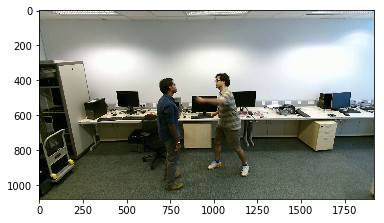

(1080, 1920, 3)


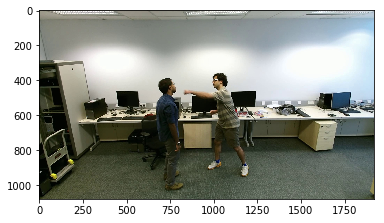

0.08338737487792969


True

In [9]:
img1="C:\\tensorflow1\\tf-pose-estimation\\frames\\frame18.jpg"
img2="C:\\tensorflow1\\tf-pose-estimation\\frames\\frame20.jpg"

a,b=readImage(img1, img2)
rgb=opticalFlowDense(a,b)
#cv2.imwrite("frames//FlowMask.jpg", rgb)
homo1,homo2=twoImgPosePoints(a,b)
newImg = drawHumans(rgb, homo2)
cv2.imwrite("frames//HumanFlow.jpg", newImg)


In [ ]:
good_new=p1[st==1]
good_old=p0[st==1]


In [ ]:
img = cv2.add(frame,mask)
plt.imshow(image1)
plt.axis("off")
plt.show()
plt.imshow(image2)
plt.axis("off")
plt.show()
print(image1.shape)
plt.imshow(img)
plt.axis("off")
plt.show()

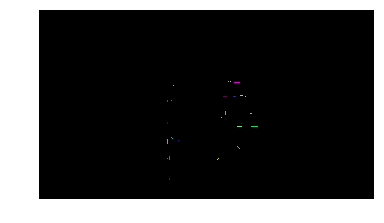

(1080, 1920, 3)


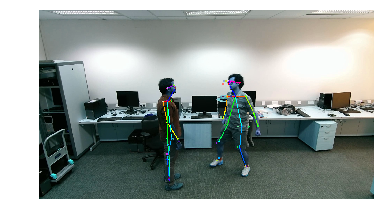

In [95]:
#img = cv2.add(frame,mask)
plt.imshow(mask)
plt.axis("off")
plt.show()
print(image1.shape)
plt.imshow(frame)
plt.axis("off")
plt.show()